In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_70861_G')

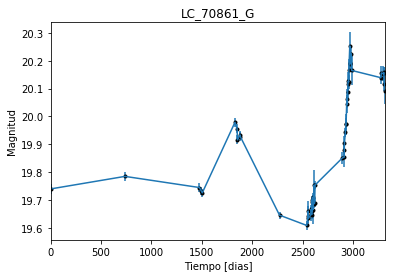

In [2]:
data = np.genfromtxt('LC_70861_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_70861_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

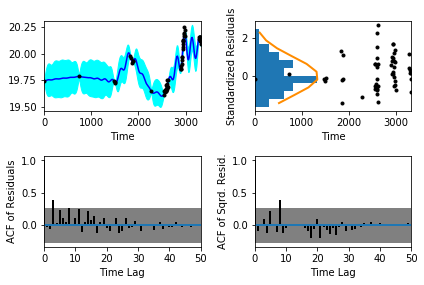

In [5]:
sample.assess_fit()

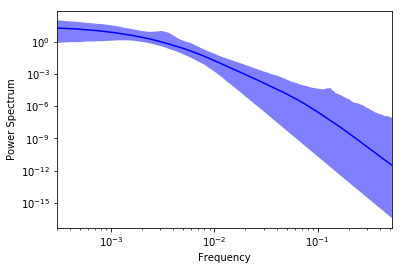

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_70861_G')

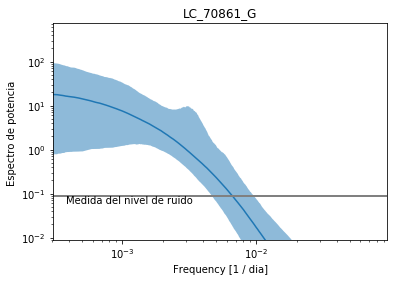

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_70861_G')

Text(0.5,1,'Prediccion , valor esperado 70861_G')

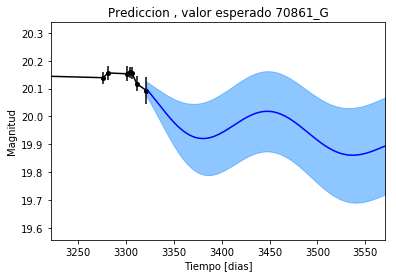

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 70861_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_70861_G')

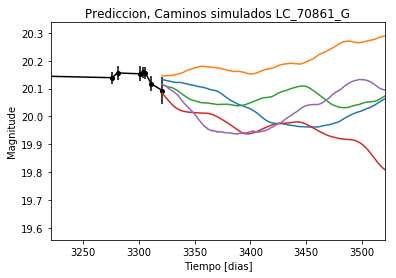

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_70861_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_70861_G')

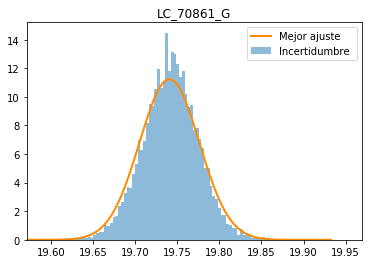

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_70861_G')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_G')

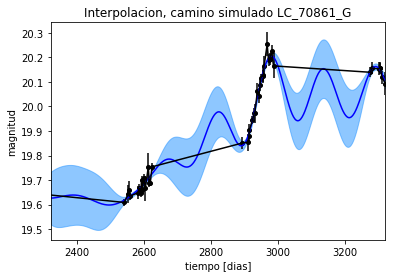

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_G')

Text(0.5,1,'Interpolacion, camino simulado LC_70861_G')

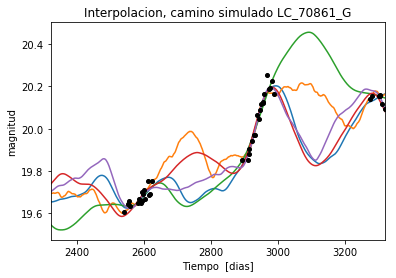

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_70861_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 985.800195286
Median: 0.00878142433905
Standard deviation: 0.168980800272
68% credibility interval: [ 0.00102053  0.11706534]
95% credibility interval: [  3.54392439e-04   6.74095972e-01]
99% credibility interval: [  3.16406300e-04   9.60994881e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 782.165115221
Median: 0.002355746897
Standard deviation: 0.0552851339969
68% credibility interval: [ 0.00057407  0.01698169]
95% credibility interval: [ 0.00033255  0.16044306]
99% credibility interval: [  3.08525695e-04   3.99100839e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 311.727777541
Median: 0.0108319870425
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1616.79651141
Median: 117.941800729
Standard deviation: 1.75148263269
68% credibility interval: [ 115.982729    119.22199852]
95% credibility interval: [ 113.31887405  119.97071598]
99% credibility interval: [ 111.18743164  120.32731355]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 386.270059692
Median: 0.448946927675
Standard deviation: 1.82015772752
68% credibility interval: [ 0.06739408  2.85776442]
95% credibility interval: [ 0.02476782  6.54017262]
99% credibility interval: [ 0.01495541  8.5174758 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 517.079978481
Median: 0.218156306871
Standard deviation: 7.27072421006
68% credibility interval: [ 0.0086024  3.718101 ]
95% credibility interval: [  1.68361558e-03 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4190.1931347
Median: 8.90648677921e-17
Standard deviation: 1.6866851671e+50
68% credibility interval: [  2.10362964e-44   3.31746501e-01]
95% credibility interval: [  7.59743969e-93   5.38033444e+39]
99% credibility interval: [  1.25431109e-103   1.22476716e+047]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 4107.28072013
Median: 19.8433343524
Standard deviation: 0.10180765578
68% credibility interval: [ 19.75899203  19.9264066 ]
95% credibility interval: [ 19.63477316  20.0563753 ]
99% credibility interval: [ 19.50107829  20.16206231]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 466.231614273
Median: 0.00411985509706
Standard deviation: 0.213270428326
68% credibility interval: [ 0.          0.21123884]
95% credibility interval: [ 0.          0.83648659]
99% credibility interval: [ 0.          0.99849169]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 466.231614273
Median: 0.00411985509706
Standard deviation: 0.213270428326
68% credibility interval: [ 0.          0.21123884]
95% credibility interval: [ 0.          0.83648659]
99% credibility interval: [ 0.          0.99849169]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 716.006200701
Median: 0.0
Standard deviation: 0.000791323044297
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1616.79651141
Median: 117.941800729
Standard deviation: 1.75148263269
68% credibility interval: [ 115.982729    119.22199852]
95% credibility interval: [ 113.31887405  119.97071598]
99% credibility interval: [ 111.18743164  120.32731355]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3165.33929303
Median: 0.0480085850889
Standard deviation: 0.0563060268854
68% credibility interval: [ 0.02953648  0.08913307]
95% credibility interval: [ 0.01919327  0.17766409]
99% credibility interval: [ 0.01510564  0.31087903]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2986.9984648
Median: 0.945393002938
Standard deviation: 0.155725348404
68% credibility interval: [ 0.81065382  1.11133622]
95% credibility interval: [ 0.69376843  1.30126574]
99% credibility interval: [ 0.62625886  1.46388633]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 846.884920648
Median: 0.000114031621472
Standard deviation: 0.0413861933483
68% credibility interval: [  1.33968200e-06   2.31257687e-03]
95% credibility interval: [  1.31378182e-44   2.15995764e-02]
99% credibility interval: [  1.45518141e-51   4.83918871e-02]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 985.800195286
Median: (-0.0551753163833-0.994703225822j)
Standard deviation: 1.70965906857
68% credibility interval: [-0.73554321-2.8604568j  -0.00641215-0.00949932j]
95% credibility interval: [ -4.23546991e+00+0.j          -2.22671337e-03-0.00248006j]
99% credibility interval: [ -6.03810892e+00+0.j          -1.98803941e-03-0.00182676j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 782.165115221
Median: (-0.0148015942906+0.0201990407982j)
Standard deviation: 1.38430880937
68% credibility interval: [-0.10669912+0.j -0.00360701+0.j]
95% credibility interval: [-1.00809350+0.j         -0.00208946+1.82635499j]
99% credibility interval: [ -2.50762453e+00+2.76965225j  -1.93852411e-03+0.02540922j]
Posterior summary for param